In [1]:


# maths library for matrix manipulation
import numpy as np

# matplotlib is a library for plotting things inside Python
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# This is a library for reading and writing image files

from skimage import io

In [3]:
# a library for finding files


import glob 

In [4]:
# JPGList = glob.glob('../ImageData/TeodoraImages/*/*.jpg')


JPGList = glob.glob('/home/impett/Downloads/Annunc2/AnnuncsJun18/*/*.jpg')




In [5]:
len(JPGList)

505

In [6]:
allList = JPGList 

In [7]:
# allList is the list of all image file names

len(allList)

505

In [8]:
allList[13]   

'/home/impett/Downloads/Annunc2/AnnuncsJun18/Zeri/100907_gw.jpg'

In [9]:
io.imread(    allList[13]     ) 

array([[[73, 72, 70],
        [73, 72, 70],
        [76, 75, 73],
        ...,
        [56, 56, 56],
        [59, 59, 59],
        [59, 59, 59]],

       [[57, 56, 54],
        [57, 56, 54],
        [59, 58, 56],
        ...,
        [52, 52, 52],
        [55, 55, 55],
        [55, 55, 55]],

       [[49, 48, 46],
        [49, 48, 46],
        [49, 48, 46],
        ...,
        [49, 49, 49],
        [51, 51, 51],
        [51, 51, 51]],

       ...,

       [[98, 99, 94],
        [72, 73, 68],
        [83, 84, 79],
        ...,
        [41, 41, 41],
        [42, 42, 42],
        [42, 42, 42]],

       [[90, 91, 86],
        [71, 72, 67],
        [79, 80, 75],
        ...,
        [41, 41, 41],
        [42, 42, 42],
        [42, 42, 42]],

       [[80, 81, 76],
        [67, 68, 63],
        [72, 73, 68],
        ...,
        [41, 41, 41],
        [42, 42, 42],
        [42, 42, 42]]], dtype=uint8)

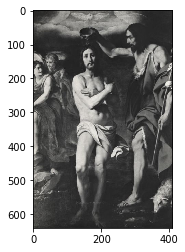

In [10]:
plt.imshow(     io.imread(    allList[13]     )     ) 

In [11]:
Im = io.imread( allList[13] )

In [12]:
from skimage import feature

In [13]:
from skimage import transform

In [14]:
Imr = transform.resize(Im,(256,256))

/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [15]:
F = feature.hog(Imr,  pixels_per_cell=(16,16)  )

/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [16]:
import tqdm

In [17]:
allImages = []

for fileName in tqdm.tqdm(allList):
    im = io.imread(fileName)
    imr = transform.resize(im,(256,256))
    allImages.append(imr)
    

  0%|          | 0/505 [00:00<?, ?it/s]/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
100%|██████████| 505/505 [00:14<00:00, 35.70it/s]


In [18]:
imageFeatures = []
for image in tqdm.tqdm(allImages):
    F = feature.hog(image,  pixels_per_cell=(16,16)  )
    imageFeatures.append(F)
    

  0%|          | 0/505 [00:00<?, ?it/s]/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
100%|██████████| 505/505 [00:09<00:00, 52.57it/s]


In [19]:
from scipy.spatial import distance

In [20]:
imf = np.asarray(imageFeatures)
mydistances = distance.squareform(distance.pdist(imf))

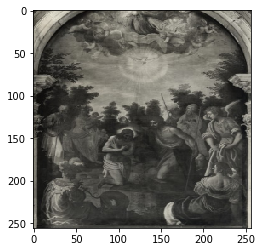

In [21]:
search_im = 3
plt.imshow(allImages[search_im])

In [22]:
# plt.figure(figsize=(15,15))
# idx = np.argsort(mydistances[search_im,:])
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.imshow( allImages[idx[i]])
    

In [ ]:
allImageSections = []

for fileName in tqdm.tqdm(allList):
    im = io.imread(fileName)
    
    for j in range(100):
        myshape = np.shape(im)
        w = myshape[0]
        h = myshape[1]
        size = np.random.randint(low=50,high=150)
        minw = np.random.randint(w - size)
        maxw = np.random.randint(h - size)

        newim = im[minw:minw+size,maxw:maxw+size,:]
        imr = transform.resize(newim,(256,256))
        allImageSections.append(imr)
    

  0%|          | 0/505 [00:00<?, ?it/s]/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
 12%|█▏        | 61/505 [01:26<10:26,  1.41s/it]

In [ ]:
from sklearn import decomposition

In [ ]:
imageFeatureSections = []
for image in tqdm.tqdm(allImageSections):
    F = feature.hog(image,  pixels_per_cell=(16,16)  )
    imageFeatureSections.append(F)
    

In [ ]:
imf = np.asarray(imageFeatureSections)

In [ ]:
mypca = decomposition.PCA(n_components=50)

In [ ]:
imf_pca = mypca.fit_transform(imf)

In [ ]:
np.shape(imf_pca)

In [ ]:
mydistances = distance.squareform(distance.pdist(imf_pca))

In [ ]:
search_im = 35
plt.imshow(allImageSections[search_im])

In [ ]:
plt.figure(figsize=(15,15))
idx = np.argsort(mydistances[search_im,:])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow( allImageSections[idx[i]])
    plt.axis('off')

In [ ]:
testIm = allImages[3]

In [ ]:
%matplotlib nbagg
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(allImages[3])
coords = []
def onclick(event):
    coords.append( [event.xdata, event.ydata])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [ ]:
xmin = int(coords[0][0])
ymin = int(coords[0][1])
xmax = int(coords[1][0])
ymax = int(coords[1][1])

In [ ]:
[xmin, xmax, ymin, ymax]

In [ ]:
%matplotlib inline
plt.imshow(testIm[ymin:ymax,xmin:xmax,:])

In [ ]:
queryIm = testIm[ymin:ymax,xmin:xmax,:]
queryF = feature.hog(image,  pixels_per_cell=(16,16)  )

In [ ]:
np.shape(queryF.reshape(1,-1))

In [ ]:
np.shape(imf)

In [ ]:
# querydistances = distance.cdist(imf,queryF.reshape(1,-1))
qf_pca = mypca.transform(queryF.reshape(1,-1))
querydistances = distance.cdist(imf_pca,qf_pca)

In [ ]:
np.shape(imf)

In [ ]:
plt.hist(querydistances,100);

In [ ]:
plt.figure(figsize=(15,15))
idx = np.argsort(querydistances,axis=0)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow( allImageSections[idx[i][0]])
    plt.axis('off')
    plt.title('distance = ' + str(querydistances[idx[i][0]]))